## Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_data.csv', index_col=0)
df.head()

,date,NY_cgas,US_cgas,WTI_crude_oil,NY_hoil,Open,High,Low,Close,Volume,...,CDLSHOOTINGSTAR_Bear,CDLSPINNINGTOP_Bear,CDLSPINNINGTOP_Bull,CDLSTICKSANDWICH_Bull,CDLTASUKIGAP_Bear,CDLTASUKIGAP_Bull,CDLTHRUSTING_Bear,CDLTRISTAR_Bear,CDLTRISTAR_Bull,NO_PATTERN
0,1986-06-02,0.468,0.445,13.80,0.402,-0.910826,-0.924568,-0.924449,-0.925426,-0.917674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1986-06-03,0.436,0.418,13.35,0.393,-0.911828,-0.926807,-0.924611,-0.924952,-0.920866,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1986-06-04,0.418,0.398,13.15,0.378,-0.911357,-0.926014,-0.925708,-0.926537,-0.919621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1986-06-05,0.431,0.415,13.21,0.390,-0.912930,-0.926657,-0.924875,-0.924811,-0.922921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1986-06-06,0.421,0.403,12.73,0.385,-0.911217,-0.926245,-0.923840,-0.924791,-0.922921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
y = df["true_value"]
X = df.iloc[:, 1:-1]

In [4]:
y

0       1.0
1      -1.0
2       1.0
3       1.0
4      -1.0
       ... 
8914   -1.0
8915    1.0
8916   -1.0
8917   -1.0
8918    1.0
Name: true_value, Length: 8919, dtype: float64

In [5]:
X

,NY_cgas,US_cgas,WTI_crude_oil,NY_hoil,Open,High,Low,Close,Volume,up/down,...,CDLSEPARATINGLINES_Bull,CDLSHOOTINGSTAR_Bear,CDLSPINNINGTOP_Bear,CDLSPINNINGTOP_Bull,CDLSTICKSANDWICH_Bull,CDLTASUKIGAP_Bear,CDLTASUKIGAP_Bull,CDLTHRUSTING_Bear,CDLTRISTAR_Bear,CDLTRISTAR_Bull
0,0.468,0.445,13.80,0.402,-0.910826,-0.924568,-0.924449,-0.925426,-0.917674,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.436,0.418,13.35,0.393,-0.911828,-0.926807,-0.924611,-0.924952,-0.920866,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.418,0.398,13.15,0.378,-0.911357,-0.926014,-0.925708,-0.926537,-0.919621,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.431,0.415,13.21,0.390,-0.912930,-0.926657,-0.924875,-0.924811,-0.922921,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.421,0.403,12.73,0.385,-0.911217,-0.926245,-0.923840,-0.924791,-0.922921,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8914,2.283,2.228,75.49,2.240,3.585936,3.637751,3.634398,3.663045,0.241992,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8915,2.293,2.236,76.01,2.253,3.647556,3.653344,3.681153,3.658160,0.216526,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8916,2.317,2.260,76.58,2.259,3.640693,3.650372,3.679163,3.664932,0.298933,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8917,2.322,2.264,76.83,2.263,3.646294,3.655262,3.676371,3.650469,0.310630,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scores = []

#run logistic model
log = LogisticRegression(random_state=42).fit(X_train, y_train)
scores = np.append(scores,log.score(X_test, y_test))

#run random forest
ran = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
scores = np.append(scores,ran.score(X_test, y_test))

#run decision tree
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
scores = np.append(scores,tree.score(X_test, y_test))

#run SVM 
svm = SVC(gamma='auto').fit(X_train, y_train)
scores = np.append(scores,svm.score(X_test, y_test))

#run KNN
neighbor = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
scores = np.append(scores,neighbor.score(X_test, y_test))


Text(0.5, 1.0, 'Models')

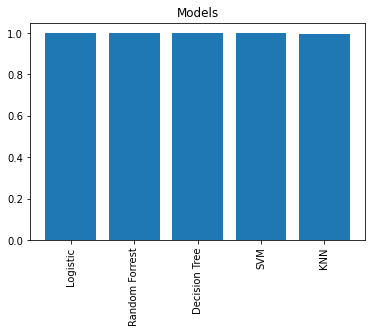

In [7]:
plt.figure()
plt.bar(range(5), scores)
labels = ['Logistic','Random Forrest','Decision Tree','SVM','KNN']
plt.xticks(range(5),labels,rotation='vertical')
plt.title('Models')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

In [8]:
scores

array([1.        , 1.        , 1.        , 0.9986413 , 0.99694293])

In [9]:
# from sklearn.metrics import roc_auc_score, roc_curve
# import matplotlib.pyplot as plt

# prob = clf.predict_proba(X_test)
# prob = prob[:,1]

# roc_auc = roc_auc_score(y_test, prob)
# fpr, tpr, thresholds = roc_curve(y_test, prob)

# # plotting the ROC curve
# plt.figure(dpi=100)
# plt.plot(fpr, tpr)
# plt.title('ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

# print('Area under the Receiver Operating Characteristic curve:', 
#       roc_auc)

In [10]:
# from sklearn.model_selection import validation_curve
# from sklearn.metrics import r2_score
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# def PolynomialRegression(degree=7, **kwargs):
#     return make_pipeline(PolynomialFeatures(degree),
#                          LinearRegression(**kwargs))

In [11]:
# degree = np.arange(0, 16)
# train_score, val_score = validation_curve(PolynomialRegression(), X, y,
#                                              param_name='polynomialfeatures__degree', 
#                                              param_range = degree, # what parameters to iterate over
#                                              cv=5, # number of validation folds, can also put in a KFold or StratifiedKFold object here
#                                              scoring = 'r2' # uses R-squared... 1 is perfect, below 0 is worse than guessing mean of training set y-values
#                                          )

# plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
# plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
# plt.legend(loc='best')
# plt.ylim(-.25, 1.25)
# plt.xlabel('degree')
# plt.ylabel('score');
# sns.despine()